Minimum point: [-1.6960519760966926, 0.028536854377947396, 0.1760440950652422]
Function value: 1.6275325010607715


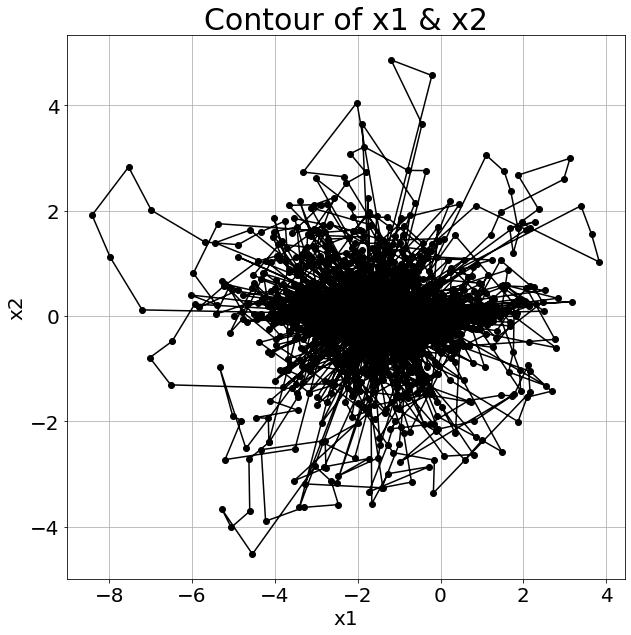

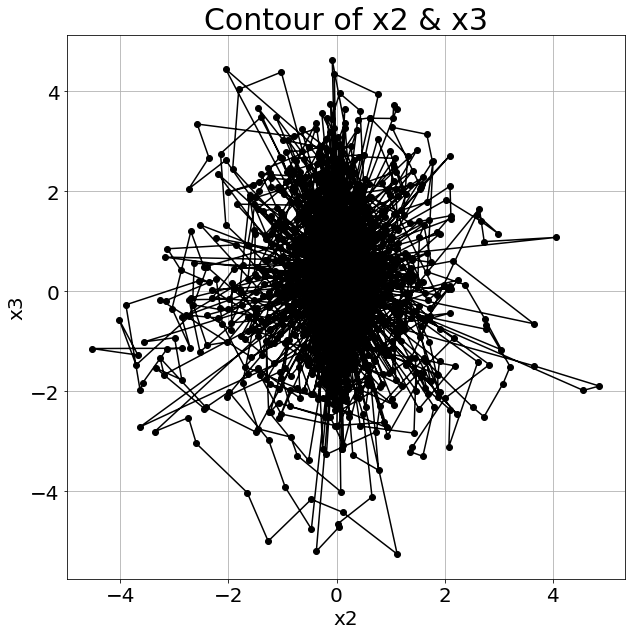

In [1]:
## This code is developed by Sreemannarayana Ikkurthi
## As a part of course notes for the course 15AES477: Multidisciplinary Design Optimization (MDO) 
## In support of Dr. Rajesh Senthil Kumar T., Assistant Professor 
## Department of Aerospace Engneering, Amrita Vishwa Vidyapeetham

################################################# LIBRARIES ###############################################################
import random
import math
import matplotlib.pyplot as plt
###########################################################################################################################

################################################# FUNCTIONS ###############################################################
## BOLTZMAN PROBABILITY FUNCTION
def boltz_prob(del_f, T):
    return math.exp(-del_f/T)

## FUNCTION TO CREATE RANDOM POINT
def rand_point(x, fac):
    def rand_neigh(x, fac):
        if random.randint(0, 1) == 1:
            n_x = x + random.random()*fac
        else:
            n_x = x - random.random()*fac
        return n_x
    rand_x = [rand_neigh(i, fac) for i in x]
    return rand_x

## DIFFERENCE OF FUNCTION VALUES BETWEEN TWO POINTS
def del_fun(x1, x2):
    del_f = f(x2) - f(x1)
    return del_f

## INITIAL TEMPERATURE IN THE NEIGHBOURHOOD OF A POINT
def Temp(x, fac):
    li_f = [f(rand_point(x, fac)) for i in range(10)]
    T = sum(li_f)/len(li_f)
    return T

## DISTANCE BETWEEN TWO POINTS
def dist(x1, x2):
    li = [(x1[i] - x2[i])**2 for i in range(len(x1))]
    del_x = sum(li)**0.5
    return del_x
###########################################################################################################################

############################################# SIMULATED ANNEALING #########################################################
def Sim_Ann(ini_x, fac, T, t_fac, n_fac):   
    x1 = ini_x 
    x2 = rand_point(x1, fac) 
    delta = dist(x1, x2)     
    del_f = del_fun(x1, x2)
    good_x = [x1]            ## LIST OF GOOD POINTS
    good_f = [f(x1)]         ## LIST OF FUNCTION VALUES OF GOOD POINTS
    while (delta > 0.0001):
        n = 0
        while n < n_fac:     
            if del_f <= 0:
                good_x.append(x2)
                good_f.append(f(x2))
                x1 = x2
                x2 = rand_point(x1, fac)
            elif (del_f > 0) and (T != 0):
                p = boltz_prob(del_f, T)
                if random.choices([0, 1], weights = [1-p, p]) == [1]:
                    x1 = x2
                    x2 = rand_point(x1, fac)
                else:
                    x2 = good_x[good_f.index(min(good_f))] 
            else:
                x2 = good_x[good_f.index(min(good_f))] 
            del_f = del_fun(x1, x2)
            n += 1    
        T = t_fac*T
        delta = dist(x1, x2)
    return x1, f(x1), good_x
    
###########################################################################################################################

################################################# INPUT ARENA #############################################################
## Objective function
def f(x):
    f_v = 100*((abs(x[1] - (0.01*(x[0]**2))))**0.5) + 0.01*(abs(x[0]+10)) + x[2]**2
    return f_v

ini_x = [-5, 0, 0] ## INITIAL SEARCH POINT
fac = 1         ## FACTOR OF SEARCH
T = Temp(ini_x, 1) ## INITIALIZING TEMPERATURE
t_fac = 0.5     ## TEMPERATURE FACTOR
n_fac = 10000   ## n FACTOR
###########################################################################################################################

(min_x, min_f, good_x) = Sim_Ann(ini_x, fac, T, t_fac, n_fac)
print(f'Minimum point: {min_x}')
print(f'Function value: {min_f}')

###################################################### PLOT ###############################################################
li_x = [[good_x[i][j] for i in range(len(good_x))] for j in range(len(ini_x))]

#Plotting the figure
for k in range(len(ini_x)-1):
    plt.figure(figsize = (10, 10))
    plt.grid()
    plt.plot(li_x[k], li_x[k+1], marker = 'o', color = 'Black')
    plt.scatter(li_x[k][-1], li_x[k+1][-1], marker = 'o', s = 200, color = 'Red')
    plt.xticks(fontsize = '20')
    plt.yticks(fontsize = '20')
    plt.xlabel(f'x{k+1}', size = '20')
    plt.ylabel(f'x{k+2}', size = '20')
    plt.title(f'Contour of x{k+1} & x{k+2}', size = '30')
plt.show()
###########################################################################################################################